# VISUALIZATIONS

Output of each function are paramters that can be used in Apache ECharts

In [1]:
import pandas as pd
from IPython.display import display, Image

## Waterfall Plot

In [2]:
def waterfall_plot(df: pd.DataFrame, x: str, y: str, title: str):
    vals = df[y].to_list()
    color_labels =[]
    for i in range (1, len(vals)):
        if vals[i] > vals[i-1]:
            color_labels.append('i')
            i_list = [vals[0]]
            d_list = ['-']
        else:
            color_labels.append('d')
            i_list = ['-']
            d_list = [0]
    y = [0]
    c = 0
    for i in range(1, len(vals)):
        if color_labels[c] == 'd':
            y.append(round(vals[i], 2))
            d_list.append(round(vals[i-1] - vals[i], 2))
            i_list.append('-')
        else:
            y.append(vals[i-1])
            i_list.append(round(vals[i] - vals[i-1], 2))
            d_list.append('-')
        c += 1
    return {
        't': title,
        'x': df[x].to_list(),
        'y': y,
        'i': i_list,
        'd': d_list
    }

In [34]:
df = pd.read_csv('datasets/2/Electric_Production.csv')
df['Year'] = df['DATE'].apply(lambda x: x[-4:])
df.head()

,DATE,IPG2211A2N,Year
0,1/1/1985,72.5052,1985
1,2/1/1985,70.6720,1985
2,3/1/1985,62.4502,1985
3,4/1/1985,57.4714,1985
4,5/1/1985,55.3151,1985


In [4]:
df = pd.DataFrame(df[df['Year'] == '1985'])
df

,DATE,IPG2211A2N,Year
0,1/1/1985,72.5052,1985
1,2/1/1985,70.6720,1985
2,3/1/1985,62.4502,1985
3,4/1/1985,57.4714,1985
4,5/1/1985,55.3151,1985
5,6/1/1985,58.0904,1985
6,7/1/1985,62.6202,1985
7,8/1/1985,63.2485,1985
8,9/1/1985,60.5846,1985
9,10/1/1985,56.3154,1985


In [5]:
waterfall_plot(df, 'DATE', 'IPG2211A2N', 'Electric Production')

{'t': 'Electric Production',
 'x': ['1/1/1985',
  '2/1/1985',
  '3/1/1985',
  '4/1/1985',
  '5/1/1985',
  '6/1/1985',
  '7/1/1985',
  '8/1/1985',
  '9/1/1985',
  '10/1/1985',
  '11/1/1985',
  '12/1/1985'],
 'y': [0,
  70.67,
  62.45,
  57.47,
  55.32,
  55.3151,
  58.0904,
  62.6202,
  60.58,
  56.32,
  56.3154,
  58.0005],
 'i': [72.5052, '-', '-', '-', '-', 2.78, 4.53, 0.63, '-', '-', 1.69, 10.71],
 'd': ['-', 1.83, 8.22, 4.98, 2.16, '-', '-', '-', 2.66, 4.27, '-', '-']}

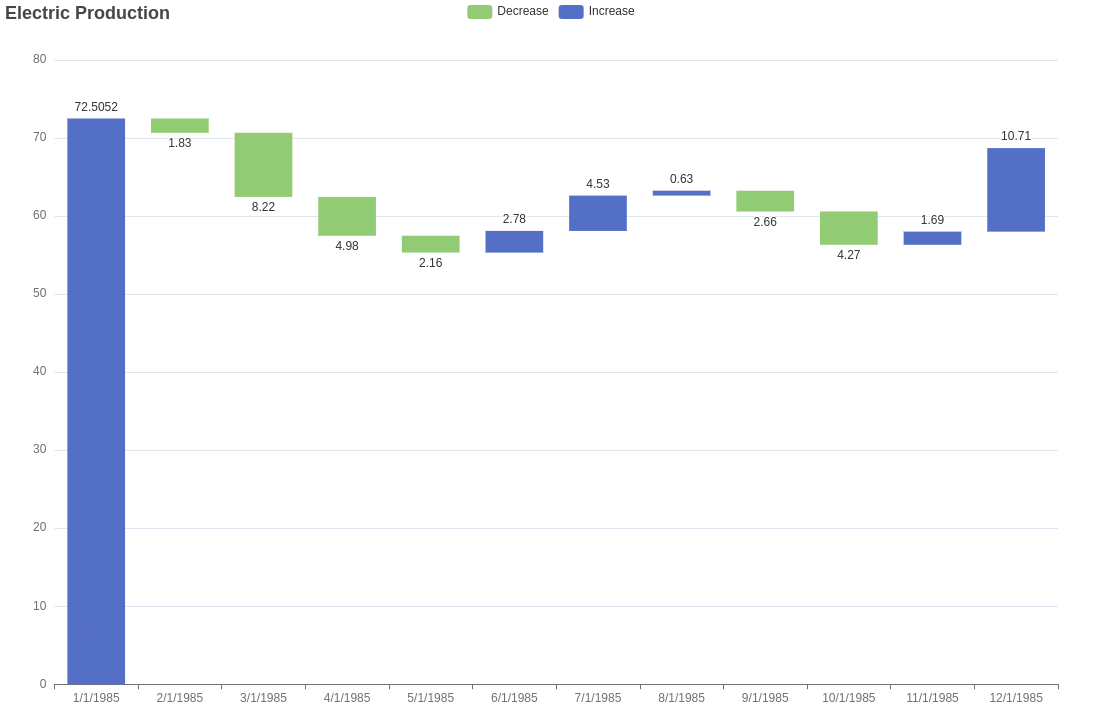

In [6]:
display(Image(filename = 'plots/echarts_pngs/waterfall.png'))

## Stacked Area Plot

In [7]:
def stacked_area_plot(df, columns, x, title):
    return {
        'title': title,
        'names': columns,
        'vals': list(df[columns].values.T),
        'x': df[x].to_list()
    }

In [8]:
df = pd.read_csv('datasets/3/DailyDelhiClimateTrain.csv')
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [9]:
x = stacked_area_plot(df, ['meantemp', 'humidity', 'wind_speed', 'meanpressure'], 'date', 'Delhi weather')

In [10]:
x['x'][:30]

['2013-01-01',
 '2013-01-02',
 '2013-01-03',
 '2013-01-04',
 '2013-01-05',
 '2013-01-06',
 '2013-01-07',
 '2013-01-08',
 '2013-01-09',
 '2013-01-10',
 '2013-01-11',
 '2013-01-12',
 '2013-01-13',
 '2013-01-14',
 '2013-01-15',
 '2013-01-16',
 '2013-01-17',
 '2013-01-18',
 '2013-01-19',
 '2013-01-20',
 '2013-01-21',
 '2013-01-22',
 '2013-01-23',
 '2013-01-24',
 '2013-01-25',
 '2013-01-26',
 '2013-01-27',
 '2013-01-28',
 '2013-01-29',
 '2013-01-30']

In [11]:
[round(i/10, 3) for i in x['vals'][3][:30].tolist()], x['names'][3]

([101.567,
  101.78,
  101.867,
  101.717,
  101.65,
  101.8,
  102.0,
  101.871,
  101.7,
  101.567,
  101.614,
  101.557,
  101.333,
  101.517,
  101.586,
  101.667,
  101.583,
  101.45,
  102.167,
  102.029,
  102.1,
  102.18,
  102.05,
  102.05,
  102.075,
  101.967,
  101.814,
  101.783,
  101.662,
  101.786],
 'meanpressure')

In [12]:
x['names']

['meantemp', 'humidity', 'wind_speed', 'meanpressure']

In [13]:
x['title']

'Delhi weather'

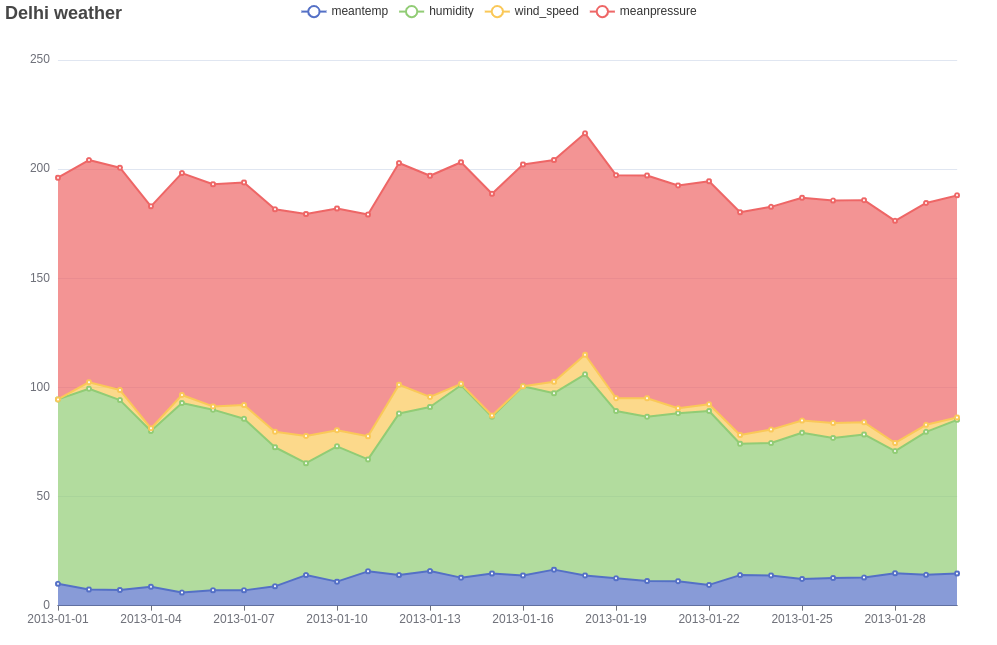

In [14]:
display(Image(filename = 'plots/echarts_pngs/stacked_area.png'))


## Lag Plot

In [15]:
from sklearn.cluster import KMeans



In [35]:
def lag_plot(timeseries, lag, data_reduce = 1):
    x = timeseries.values[:-lag].tolist()
    y = timeseries.values[lag:].tolist()
    data = []
    for i in range(len(x)):
        data.append([x[i], y[i]])
    return data
    kmeans = KMeans(int(len(data)/data_reduce))
    kmeans.fit(data)
    data = kmeans.cluster_centers_
    return data.tolist()
    
    

In [36]:
df

,DATE,IPG2211A2N,Year
0,1/1/1985,72.5052,1985
1,2/1/1985,70.6720,1985
2,3/1/1985,62.4502,1985
3,4/1/1985,57.4714,1985
4,5/1/1985,55.3151,1985
...,...,...,...
392,9/1/2017,98.6154,2017
393,10/1/2017,93.6137,2017
394,11/1/2017,97.3359,2017
395,12/1/2017,114.7212,2017


In [41]:
lag_plot(df['IPG2211A2N'], 3)

[[72.5052, 57.4714],
 [70.672, 55.3151],
 [62.4502, 58.0904],
 [57.4714, 62.6202],
 [55.3151, 63.2485],
 [58.0904, 60.5846],
 [62.6202, 56.3154],
 [63.2485, 58.0005],
 [60.5846, 68.7145],
 [56.3154, 73.3057],
 [58.0005, 67.9869],
 [68.7145, 62.2221],
 [73.3057, 57.0329],
 [67.9869, 55.8137],
 [62.2221, 59.9005],
 [57.0329, 65.7655],
 [55.8137, 64.4816],
 [59.9005, 61.0005],
 [65.7655, 57.5322],
 [64.4816, 59.3417],
 [61.0005, 68.1354],
 [57.5322, 73.8152],
 [59.3417, 70.062],
 [68.1354, 65.61],
 [73.8152, 60.1586],
 [70.062, 58.8734],
 [65.61, 63.8918],
 [60.1586, 68.8694],
 [58.8734, 70.0669],
 [63.8918, 64.1151],
 [68.8694, 60.3789],
 [70.0669, 62.4643],
 [64.1151, 70.5777],
 [60.3789, 79.8703],
 [62.4643, 76.1622],
 [70.5777, 70.2928],
 [79.8703, 63.2384],
 [76.1622, 61.4065],
 [70.2928, 67.1097],
 [63.2384, 72.9816],
 [61.4065, 75.7655],
 [67.1097, 67.5152],
 [72.9816, 63.2832],
 [75.7655, 65.1078],
 [67.5152, 73.8631],
 [63.2832, 77.9188],
 [65.1078, 76.6822],
 [73.8631, 73.3523],

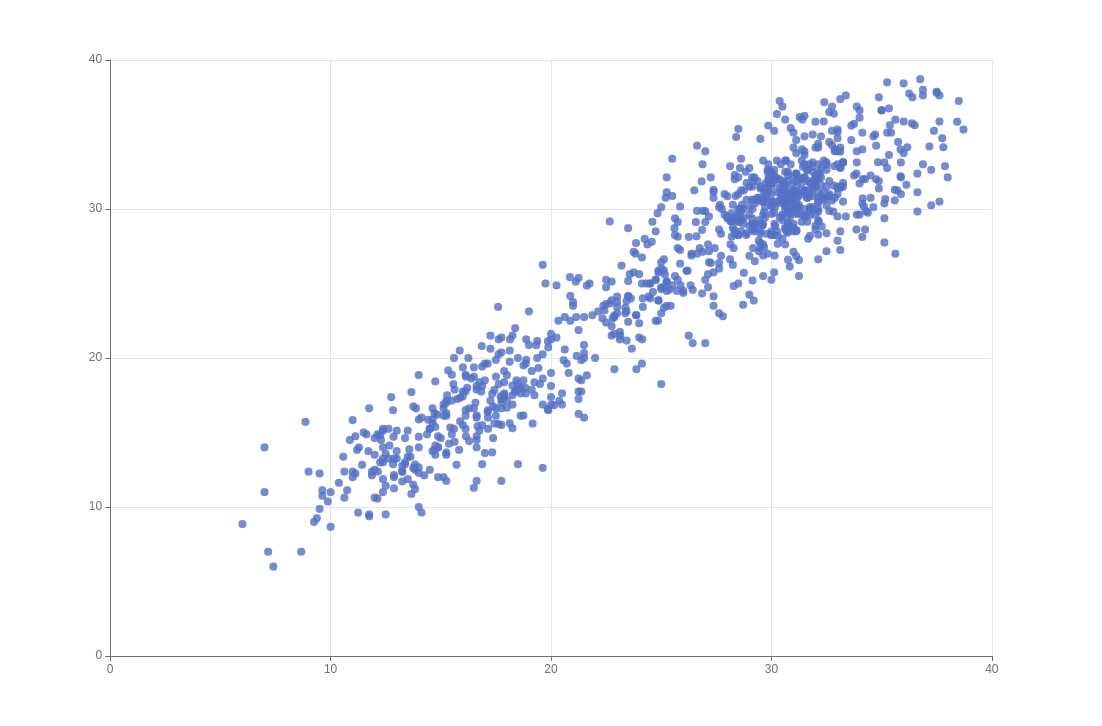

In [18]:
display(Image(filename='plots/echarts_pngs/lagplot.png'))

## Stream Graph

In [19]:
df = pd.read_csv('datasets/3/DailyDelhiClimateTrain.csv')
df['month'] = df['date'].apply(lambda x: x[5:7])
df['year'] = df['date'].apply(lambda x: x[:4])
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,month,year
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,01,2013
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,01,2013
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,01,2013
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,01,2013
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,01,2013


In [20]:
df1 = pd.DataFrame(df[df['month'] == '01'])
df1 = pd.DataFrame(df1[df1['year'] == '2013'])
df1['meanpressure'] = df1['meanpressure'].apply(lambda x: x/15)
df1

,date,meantemp,humidity,wind_speed,meanpressure,month,year
0,2013-01-01,10.000000,84.500000,0.000000,67.711111,01,2013
1,2013-01-02,7.400000,92.000000,2.980000,67.853333,01,2013
2,2013-01-03,7.166667,87.000000,4.633333,67.911111,01,2013
3,2013-01-04,8.666667,71.333333,1.233333,67.811111,01,2013
4,2013-01-05,6.000000,86.833333,3.700000,67.766667,01,2013
5,2013-01-06,7.000000,82.800000,1.480000,67.866667,01,2013
6,2013-01-07,7.000000,78.600000,6.300000,68.000000,01,2013
7,2013-01-08,8.857143,63.714286,7.142857,67.914286,01,2013
8,2013-01-09,14.000000,51.250000,12.500000,67.800000,01,2013
9,2013-01-10,11.000000,62.000000,7.400000,67.711111,01,2013


In [21]:
def stream_graph(df, columns, x):
    vals = []
    for i in columns:
        for val_idx in range(len(df[i].values.tolist())):
            vals.append([df[x].values[val_idx], df[i].values[val_idx], i])
    return {
        'data': vals,
        'names': columns
    }

In [22]:
stream_graph(df1, ['meantemp', 'humidity', 'wind_speed', 'meanpressure'], 'date')

{'data': [['2013-01-01', 10.0, 'meantemp'],
  ['2013-01-02', 7.4, 'meantemp'],
  ['2013-01-03', 7.166666666666667, 'meantemp'],
  ['2013-01-04', 8.666666666666666, 'meantemp'],
  ['2013-01-05', 6.0, 'meantemp'],
  ['2013-01-06', 7.0, 'meantemp'],
  ['2013-01-07', 7.0, 'meantemp'],
  ['2013-01-08', 8.857142857142858, 'meantemp'],
  ['2013-01-09', 14.0, 'meantemp'],
  ['2013-01-10', 11.0, 'meantemp'],
  ['2013-01-11', 15.714285714285714, 'meantemp'],
  ['2013-01-12', 14.0, 'meantemp'],
  ['2013-01-13', 15.833333333333334, 'meantemp'],
  ['2013-01-14', 12.833333333333334, 'meantemp'],
  ['2013-01-15', 14.714285714285714, 'meantemp'],
  ['2013-01-16', 13.833333333333334, 'meantemp'],
  ['2013-01-17', 16.5, 'meantemp'],
  ['2013-01-18', 13.833333333333334, 'meantemp'],
  ['2013-01-19', 12.5, 'meantemp'],
  ['2013-01-20', 11.285714285714286, 'meantemp'],
  ['2013-01-21', 11.2, 'meantemp'],
  ['2013-01-22', 9.5, 'meantemp'],
  ['2013-01-23', 14.0, 'meantemp'],
  ['2013-01-24', 13.833333333333

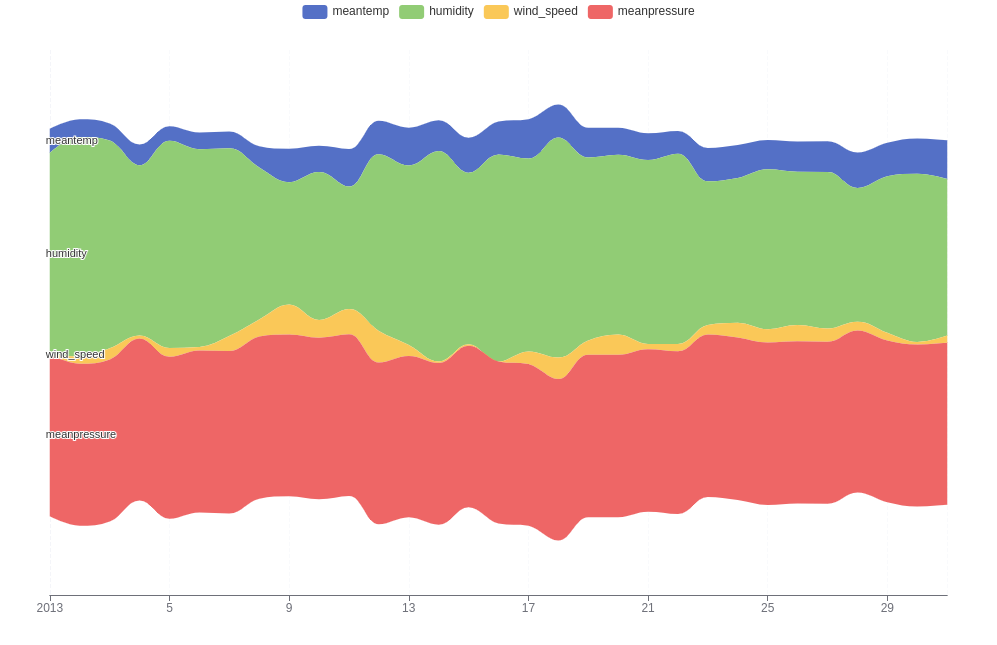

In [23]:
display(Image(filename='plots/echarts_pngs/stream-.png'))

In [24]:
df

,date,meantemp,humidity,wind_speed,meanpressure,month,year
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,01,2013
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,01,2013
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,01,2013
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,01,2013
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,01,2013
...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,12,2016
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,12,2016
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,12,2016
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,12,2016


In [25]:
from tsa.visualization import single_line_plot

In [27]:
df['date'] = pd.to_datetime(df['date'])
single_line_plot(df, 'date', 'meantemp', remove_time=True)

{'title': 'Plot of meantemp over date:',
 'y': [10.0,
  7.4,
  7.166666666666667,
  8.666666666666666,
  6.0,
  7.0,
  7.0,
  8.857142857142858,
  14.0,
  11.0,
  15.714285714285714,
  14.0,
  15.833333333333334,
  12.833333333333334,
  14.714285714285714,
  13.833333333333334,
  16.5,
  13.833333333333334,
  12.5,
  11.285714285714286,
  11.2,
  9.5,
  14.0,
  13.833333333333334,
  12.25,
  12.666666666666666,
  12.857142857142858,
  14.833333333333334,
  14.125,
  14.714285714285714,
  16.2,
  16.0,
  16.285714285714285,
  18.0,
  17.428571428571427,
  16.625,
  16.666666666666668,
  15.6,
  14.0,
  15.428571428571429,
  15.25,
  15.875,
  15.333333333333334,
  16.285714285714285,
  17.333333333333332,
  19.166666666666668,
  14.428571428571429,
  13.666666666666666,
  15.6,
  15.857142857142858,
  17.714285714285715,
  20.0,
  20.5,
  17.428571428571427,
  16.857142857142858,
  16.875,
  17.857142857142858,
  20.8,
  19.428571428571427,
  17.333333333333332,
  19.0,
  19.33333333333

In [28]:
from tsa.visualization import double_line_plot

In [29]:
df = pd.read_csv('datasets/5/AMZN_ts.csv')

In [30]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-01,1563.219971,1585.000000,1552.180054,1582.260010,1582.260010,4572100
1,2018-05-02,1580.979980,1588.500000,1566.359985,1569.680054,1569.680054,4360300
2,2018-05-03,1560.010010,1574.800049,1546.020020,1572.079956,1572.079956,4251900
3,2018-05-04,1562.449951,1584.900024,1562.189941,1580.949951,1580.949951,3443600
4,2018-05-07,1589.339966,1606.949951,1587.829956,1600.140015,1600.140015,3801900
...,...,...,...,...,...,...,...
247,2019-04-25,1917.000000,1922.449951,1900.310059,1902.250000,1902.250000,6099100
248,2019-04-26,1929.000000,1951.000000,1898.000000,1950.630005,1950.630005,8432600
249,2019-04-29,1949.000000,1956.339966,1934.089966,1938.430054,1938.430054,4021300
250,2019-04-30,1930.099976,1935.709961,1906.949951,1926.520020,1926.520020,3506000


In [32]:
df['Date'] = pd.to_datetime(df['Date'])
double_line_plot(df, 'Date', 'Open', 'Close', remove_time=True)

{'title': 'Plot of Open and Close over Date:',
 'y1': [1563.219971,
  1580.97998,
  1560.01001,
  1562.449951,
  1589.339966,
  1595.0,
  1600.0,
  1608.47998,
  1610.98999,
  1604.0,
  1587.800049,
  1577.5,
  1580.560059,
  1581.329956,
  1585.0,
  1589.890015,
  1571.050049,
  1598.030029,
  1603.0,
  1600.709961,
  1618.099976,
  1623.0,
  1637.030029,
  1648.900024,
  1672.98999,
  1704.51001,
  1698.560059,
  1681.119995,
  1681.51001,
  1693.0,
  1702.810059,
  1713.47998,
  1714.0,
  1706.26001,
  1709.040039,
  1742.5,
  1760.0,
  1742.619995,
  1702.51001,
  1672.369995,
  1708.109985,
  1672.540039,
  1717.0,
  1682.699951,
  1723.959961,
  1705.380005,
  1696.0,
  1724.050049,
  1738.530029,
  1737.98999,
  1764.51001,
  1803.930054,
  1821.949951,
  1811.560059,
  1848.0,
  1829.459961,
  1825.01001,
  1812.209961,
  1829.01001,
  1829.300049,
  1839.0,
  1876.050049,
  1827.329956,
  1786.48999,
  1784.0,
  1788.77002,
  1837.73999,
  1825.810059,
  1854.530029,
  1861.0,